# Palmer Penguins Data Analysis






---

### Palmer Penguins Dataset Background

The 'Palmer Penguins' dataset, collected between 2007 and 2009, was made available by [Dr. Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) from the [Palmer Station](https://www.nsf.gov/geo/opp/support/palmerst.jsp) in Antarctica, part of the [US Long Term Ecological Research Network](https://lternet.edu/). It contains data on 344 penguins of three different species, gathered from three islands in the Palmer Archipelago.

The purpose of collecting this data was to study the foraging behaviour of Antarctic penguins and its correlation with environmental variables. Originally, the findings were presented as three separate datasets, one for each species of penguin. These datasets were later combined into a single dataset, which will be explored and analysed in this Jupyter notebook.

**Sources:**

- [Kaggle.com- About the Palmer Penguins dataset](https://www.kaggle.com/code/florianspire/palmer-penguins-data-preprocessing-and-analysis)
- [Allison Host-About the Palmer Penguins dataset](https://allisonhorst.github.io/palmerpenguins/articles/intro.html)
- [UC Irvine Machine Learning Repository- About the Palmer Penguins dataset](https://archive.ics.uci.edu/dataset/690/palmer+penguins-3)





---

### Import Libraries



In [126]:
import pandas as pd 

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns


___

### Load and view summary of the dataset 

In [127]:
# Load the Palmer Penguins dataset
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

In [128]:
# Give summary of the dataset
df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


The dataset is made up of several variables:<br/>
- `island`
- `species`
- `bill_length_mm`
- `bill_depth_mm`
- `flipper_length_mm`
- `body_mass_g`
- `sex`

---

### Overview of the Palmer Penguin dataset 
<br/>
In the dataset summary each variable is accompanied by  several descriptions. <br/>


- **count:** This indicates the number of non-empty values for each column.<br />
The columns `species` and `island` have a count of 344, indicating that there are no missing values.<br />
The columns `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, and `body_mass_g` each have a count of 342, indicating two missing values per column. <br />
The column `sex` has a count of 333, implying eleven missing values.<br /><br />

- **unique:** Only applies to non-numeric fields and indicates the number of unique values in each column. <br />
`species` and `island` both contain three unique values while `sex` has two unique values.
<br /><br />

- **top:** Only applies to non-numeric fields and indicates the most frequent value in each column.<br />
In this dataset, `Adelie` is the most common species, `Biscoe` is the most common island, and `MALE` is the most common sex.
<br /><br />

- **freq:** This indicates the frequency of the 'top' value.<br/>
 In this dataset, there were 152 observations of the `Adelie` species, 168 observations of penguins made on the island of `Biscoe`, and 168 penguins were identified as `MALE` out of a total of 344.
<br /><br />

- **mean:** Only applies to numeric columns and gives the average value for each. <br /><br />

- **std** Only applies to numeric columns and gives the standard deviation for each.<br />
It measures the variation from the mean for each column. <br/><br />

- **min** Only applies to numeric columns and gives the minimum value for each. <br/><br />

- **25%** Only applies to numeric columns, representing the first quartile or 25th percentile of each column's values. <br />
For example: <br/>
in `bill_length_mm`, 25% of the values are below 39.225000 mm. <br /><br />

- **50%** Only applies to numeric columns , representing the median or 50th percentile of each column's values. <br />
For example: <br/>
17.300000 mm is the median value for `bill_depth_mm`, indicating that 50% of the values are less than 17.300000 mm.<br /><br />

- **75%** Only applies to numeric columns, representing the third quartile or 75th percentile of each column's values. <br />
For example: <br/>
in `flipper_length_mm`, 75% of the values are below 213.000000 mm.<br /><br />

- **max** Only applies to numeric columns and gives the maximum values for each. <br/><br/>


**Sources:**

([w3schools - Statistics Percentiles](https://www.w3schools.com/datascience/ds_stat_percentiles.asp))<br />
([w3resource - Pandas DataFrame: describe() function](https://www.w3resource.com/pandas/dataframe/dataframe-describe.php))<br />
([w3schools - Pandas DataFrame describe() Method](https://www.w3schools.com/python/pandas/ref_df_describe.asp))<br />
([Wikipedia - Quartiles](https://en.wikipedia.org/wiki/Quartile))<br />
([Wikipedia - Standard Deviation](https://en.wikipedia.org/wiki/Standard_deviation))<br />





---

### Variable types in the Palmer Penguins Dataset

In [129]:
# Get python variable types
variable_types = df.dtypes
# Print variable types
print(variable_types)

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object


**Sources:** <br/>
([stackoverflow- How to detect subtypes in Pandas object column](https://stackoverflow.com/questions/51817742/how-could-i-detect-subtypes-in-pandas-object-columns))<br />

In [130]:
# Get Variable types of column 'species'

object_column = df['species']
# Get the variable type of each element in the column
variable_types = object_column.apply(type)
# Get the unique variable types
unique_variable_types = variable_types.unique()

print(unique_variable_types)

[<class 'str'>]


In [131]:
# Get Variable types of column 'island'


object_column = df['island']
# Get the variable type of each element in the column
variable_types = object_column.apply(type)
# Get the unique variable types
unique_variable_types = variable_types.unique()

print(unique_variable_types)

[<class 'str'>]


In [132]:
# Get Variable types of column 'sex'


object_column = df['sex']
# Get the variable type of each element in the column
variable_types = object_column.apply(type)
# Get the unique variable types
unique_variable_types = variable_types.unique()

print(unique_variable_types)

[<class 'str'> <class 'float'>]


**Sources**: <br/>
Note: The code to get the variable types of each object column was written with the assistance of ChatGPT.

In [133]:
# Check unique values in the 'sex' column to understand why 'float' is a variable type
unique_sex_values = df['sex'].unique()
# Print unique values
print(unique_sex_values)


['MALE' 'FEMALE' nan]


The value 'nan' has been used to represent missing data. This is why 'float' is returning as a variable type.

**Source:**<br/>
([geeksforgeeks.org - Get unique values from a column in a pandas df](https://www.geeksforgeeks.org/get-unique-values-from-a-column-in-pandas-dataframe/))<br />

---

### Variable types in the Palmer Penguins data set - Python Perspective
In the exploration of variable types in Python, it was found that: <br /><br />

**Float Variables**<br />
Variables are comprised of floating point numbers.<br />
- `bill_length_mm`
- `bill_depth_mm `
- `flipper_length_mm`
- `body_mass_g `<br /><br />


**String Variables**<br />
Variables are comprised of a 'string' of characters.<br />
- `species`
- `island`
<br /><br />

**Mixed Variables**

- `sex`<br /><br />

The `sex` variable should be treated as a string for modelling purposes, as the 'float' categorisation arises from a singular missing value, which will be removed during data cleansing.<br /><br />

**Sources:**<br/>
([w3schools- Floats in Python](https://www.w3schools.com/go/go_float_data_type.php#:~:text=The%20float%20data%20types%20are,%2C%20%2D2.34%2C%20or%203597.34987.))<br />
 ([programiz.com- Strings in Python](https://www.programiz.com/python-programming/string#google_vignette))<br />


***

### Variables types in the Palmer Penguins data set - Data Analytics Perspective

From a data analysis perspective, the variables in the Palmer Penguins data set fall into two main types: Numerical (also known as Quantitative) and Categorical (also known as Qualitative).<br /><br />

**Numerical Variables:**
Represent amounts and can be Continuous or Discrete. In this dataset, all quantitative variables are Continuous, as they can assume a range of real values within a specified interval. These variables are:<br/>
- `bill_length_mm`
- `bill_depth_mm`
- `flipper_length_mm`
- `body_mass_g`

**Categorical Variables**
Represent groupings or categories and cannot be quantified. These variables are:<br/>
- `island`
- `species`
- `sex`<br/>

Categorical variables can be further categorised into Ordinal, Nominal, or Binary types. `island` and `species` fall under Nominal variables, as they lack inherent ordering among their categories.`sex `could be classified as either Binary or Nominal. While it has the criteria of a nominal variable, it also exhibits binary characteristics, with only two possible outcomes based on the dataset's information.


**Sources:**<br/>
([codecademy - Variable types for data science](https://www.codecademy.com/learn/dsf-exploratory-data-analysis-python/modules/dsf-variable-types-for-data-science/cheatsheet))<br />
([statcan - Types of variables ](https://www150.statcan.gc.ca/n1/edu/power-pouvoir/ch8/5214817-eng.htm))<br />
([outlier - discrete vs continuous variables](https://articles.outlier.org/discrete-vs-continuous-variables#section-what-is-a-discrete-variable))<br />
([PennState Eberly College of Science - binary categorical variables](https://online.stat.psu.edu/stat500/lesson/3/3.2/3.2.2#:~:text=A%20binary%20variable%20is%20a,of%20a%20binary%20categorical%20variable.))<br />


---

### Variable types in summary <br />
Based on the analysis this table summarises the variable types found in the dataset: <br />



| Variable | Python Variable type| Data Analytics Variable type |
|:-------------|:--------------:|--------------:|
| species    |    String  |       Categorical, Nominal|
| island     |    String   |       Categorical, Nominal    |
| bill_length_mm    |    Float  |       Numerical, Continuous   |
| bill_depth_mm      |     Float  |       Numerical, Continuous   |
| flipper_length_mm      |    Float  |       Numerical, Continuous   |
| body_mass_g     |       Float  |       Numerical, Continuous  |
| sex     |    String  |       Categorical, Binary, Nominal|

***

### 'island' Variable visualised as a bar chart

In [134]:
# Get the value counts for 'island'
island_count=df['island'].value_counts()

Text(0, 0.5, 'Number of Penguins')

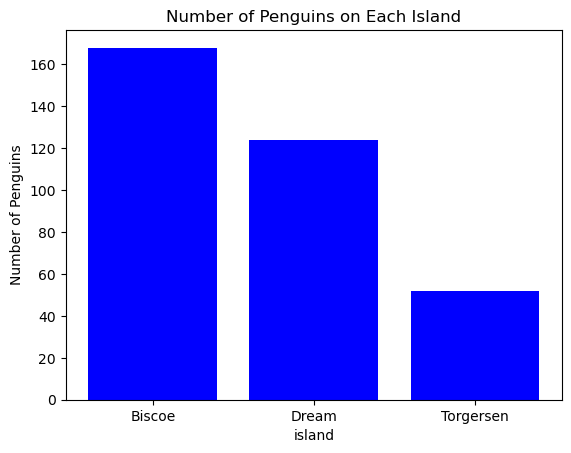

In [135]:
# Plotting the bar chart for the number of penguins on each island
plt.bar(island_count.index, island_count.values, color='blue')
plt.title('Number of Penguins on Each Island')
plt.xlabel('island')
plt.ylabel('Number of Penguins')

The bar chart displays penguin counts per island. The majority were observed on Biscoe, with fewer than 60 on Torgersen.

---

### 'bill_length_mm' variable visualised as a histogram

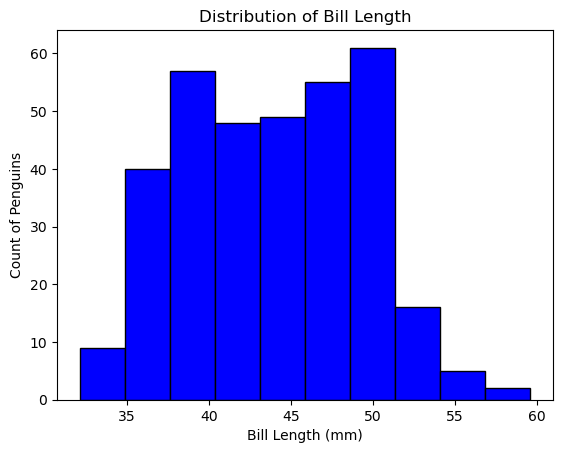

In [136]:
# Plot a histogram for the distribution of bill_length_mm
plt.hist(df['bill_length_mm'], bins=10, color='blue', edgecolor='black')
plt.title('Distribution of Bill Length')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Count of Penguins')
plt.show()


The histogram illustrates penguin bill length distribution. Most penguins fall within the 35mm to slightly over 50mm range, with a few outliers on both ends.

***

### Correlation between two variables

To begin the analysis of two variables in the Palmer Penguins dataset, The correlation between all numeric variables will first be explored. Before calculating the correlation, The data quality will be assessed and any missing values identified.<br/>
This step is crucial as missing values can interfere with plotting linear regression lines, and it's best practice to thoroughly analyse the dataset for any missing values.

In [137]:
# Check for missing values in the data frame
missing_values = df.isna().sum()

# Display the count of missing values for each column
print(missing_values)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


**Source**: <br/>([cmdlinetips.com - Get number of missing values in each column](https://cmdlinetips.com/2020/11/how-to-get-number-of-missing-values-in-each-column-in-pandas/))

Five of the columns are missing values. For the purpose of correlation analysis focus will be directed to the numeric variables: `bill_length`, `bill_depth_mm`, `flipper_length_mm`, and `body_mass_g`, each of which have two missing values.<br/>

There are a few options here:

- The missing values in each column could be replaced using mean or median imputation.
- The missing values could be dropped entirely.
- The null values could be retained in the dataset however, this would potentially cause complications when plotting linear regression lines.
<br/><br/>
Since the missing values represent less than 1% of all observations in each column, they will have little influence on the correlations among these variables. Using mean or median imputation may introduce bias into the dataset therefore, the decision is made to proceed by dropping the missing values.<br/>

**Source:**<br/>
([Eugenio "Jay" Zuccarelli- Imputation and dealing with missing data](https://towardsdatascience.com/the-dos-and-donts-of-imputation-d89d72a26a58))

In [138]:
# Remove 'nan' values from the data set

df_cleaned = df.dropna()

**Source:**<br/>
([ w3schools - dropna() function](https://www.w3schools.com/python/pandas/ref_df_dropna.asp))

### Cleaned data frame correlation matrix

In [139]:
# Create a data frame from the cleaned data set of just the numeric columns
numeric_df_cleaned = df_cleaned.select_dtypes(include='number')

# Calculate correlation matrix
correlation_matrix_cleaned = numeric_df_cleaned.corr()

# Show the correlation matrix
(correlation_matrix_cleaned)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


###  Original data frame correlation matrix

In [140]:

# Create a data frame from the cleaned data set of just the numeric columns
numeric_df = df.select_dtypes(include='number')

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Show the correlation matrix
(correlation_matrix)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000



Removing the 'nan' values did not significantly affect the correlation calculations.

**Sources**<br/>
([statology.org- Correlation in python](https://www.statology.org/correlation-in-python/))<br/>
([geeksforgeeks- Correlation matrix in python](https://www.geeksforgeeks.org/how-to-create-a-correlation-matrix-using-pandas/))<br/>


The matrix above reveals that `flipper_length_mm` and `body_mass_g` exhibit the highest correlation among variables while `bill _depth_mm` and `flipper_length_mm` show the lowest correlation.<br/>

Given the strong correlation between `flipper_length_mm` and `body_mass_g`, it makes sense to explore these variables further. The correlation will be visualized using a scatter plot.

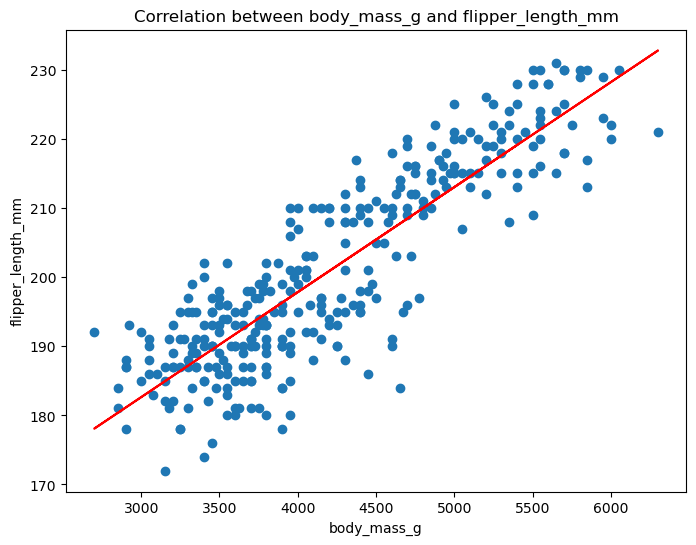

In [141]:
# Set the variables for the scatter plot
x_variable = 'body_mass_g'
y_variable = 'flipper_length_mm'

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned[x_variable], df_cleaned[y_variable])
plt.xlabel(x_variable)
plt.ylabel(y_variable)

# Get m (slope) and b(intercept) of the linear regression line
m, b = np.polyfit(df_cleaned[x_variable], df_cleaned[y_variable], 1)

# Add the linear regression line to the scatter plot
plt.plot(df_cleaned[x_variable], m*df_cleaned[x_variable]+b,color='red')

# Add title
plt.title('Correlation between body_mass_g and flipper_length_mm')

# Show graph
plt.show()

**Sources**<br/>
([machinelearningplus - Python scatter plots ](https://www.machinelearningplus.com/plots/python--plot/))<br/>
([statology.org - How to create a scatter plot with a regression line ](https://www.statology.org/scatterplot-with-regression-line-python/))<br/>

With a correlation coefficient of 0.871202 between `flipper_length_mm`  and `body_mass_g`, indicating a strong positive relationship, a clear upward linear trend in the scatter plot can be observed. This trend suggests that generally as the body mass of a penguin increases so does its flipper length. This conclusion aligns with findings from other studies, such as those by [Alison Hill, Allison Horst, Kristen Gorman](https://allisonhorst.github.io/palmerpenguins/articles/examples.html), who used 'R' in their analysis.


See others studies:<br/>
([Jingyi Fang](https://allysonf.medium.com/exploratory-data-analysis-on-palmer-archipelago-antarctica-penguin-data-41ff3e6efeda))<br/>
([Taylor via RPubs using R ](https://rpubs.com/TEHoule/PalmerPenguinPlayground))<br/>
([Shah Nawaz via RPubs using R ](https://rpubs.com/shahworld/scatter))<br/>

**Source:**<br/>
([Statistics By Jim- Correlations](https://statisticsbyjim.com/basics/correlations/#:~:text=Correlation%20Coefficient%20%3D%200.8%3A%20A%20fairly,change%20in%20a%20specific%20direction.))<br/><br/><br/>


For a deeper investigation the correlation between `flipper_length_mm` and `body_mass_g` and how it varies across the three species of penguins will be explored.

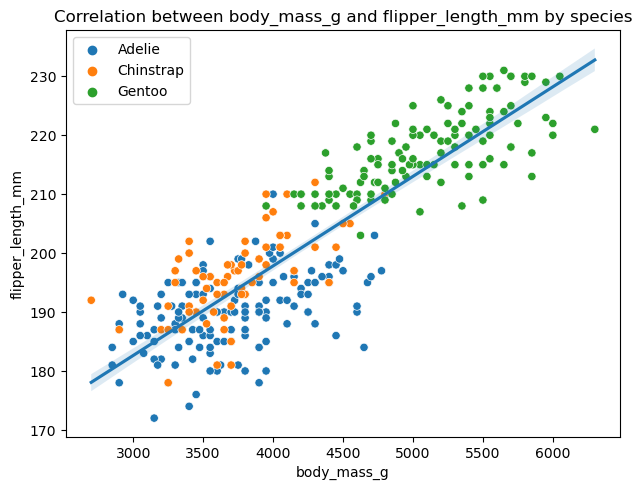

In [142]:

# Create the scatter plot and set variables
sns.scatterplot(x='body_mass_g', y='flipper_length_mm', hue='species', data=df_cleaned)

# Add a regression line to the scatter plot
sns.regplot(x='body_mass_g', y='flipper_length_mm', data=df_cleaned, scatter=False)

# Format the legend
plt.legend(loc='upper left')

# Manually adjust the layout
plt.tight_layout()

# Add title
plt.title('Correlation between body_mass_g and flipper_length_mm by species')

plt.show()


**Sources**<br/>
([ALEX LABUDA/Kaggle - Scatter plot by category ](https://www.kaggle.com/code/alabuda/classification-and-eda-palmer-penguins))<br/>
([stackoverflow - regression lines in seabourn](https://stackoverflow.com/questions/66084983/how-to-plot-one-linear-regression-scatterplot-for-multiple-columns-in-a-datafram))




From the scatter plot above it can be observed that:

- Gentoo penguins are the largest in both `body_mass_g` and `flipper_length_mm`.
- Adelie penguins have the shortest `flipper_length_mm` among the observed species.
- Chinstrap penguins have the lowest `body_weight_g` among individuals, but overall, Adelie penguins appear to have the lowest `body_weight_g` among the observed species.
- This observation aligns with the established weight ranges of each penguin species, with Chinstrap penguins being the lightest, followed by Adelie penguins, and then Gentoo penguins.

**Source:**<br/>
([oceanwide-expeditions.com - The eight great penguin species of Antartica ](https://oceanwide-expeditions.com/blog/meet-all-6-antarctic-penguin-species))<br/>




---

### Conclusion

- A positive correlation exists between `flipper_length_mm` and `body_mass_g` in this dataset.
- While positive correlation doesn't imply causation, it's logical that penguins with longer flippers tend to have heavier body mass, and vice versa.
- Some outliers in the scatter plots deviate from the trend line. Possible explanations include:
  - Fluctuations in weight due to factors like moulting, mating, seasonality, and food availability, as observed in Chinstrap and Gentoo penguins ([Wikipedia](https://en.wikipedia.org/wiki/Chinstrap_penguin), [Wikipedia](https://en.wikipedia.org/wiki/Gentoo_penguin)).
  - The age of the penguins is unknown and inclusion of juvenile penguins could lead to outliers in the flipper length to body mass ratio.
  - Among the outliers, it can be noted that the Gentoo species exhibits fewer instances of negative deviation from the regression line compared to the other two species. In fact, there appears to be a higher frequency of outliers showing a positive deviation among Gentoo penguins. This could be attributed to their better adaptability to environmental changes, potentially resulting in a higher body weight. ([Scientific American](https://www.scientificamerican.com/article/gentoo-penguins-thrive-while-adelies-and-chinstraps-falter-in-a-climate-changed-world/))




### Opportunities for further analysis

For further analysis I would propose delving deeper into the variables `flipper_length_mm` and `body_mass_g` examining their correlation in relation to `sex` and `island`. This analysis potentially show the impact of environmental factors, breeding cycles, and other variables on the correlation observed in this notebook.

---

---
